In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 


#  Reading and Understanding the data

In [7]:
# reading the data from given input
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# shape of df
housing_df.shape


(1460, 81)

In [9]:
#understing the df
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
housing_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Cleaning

In [13]:
# Let's identify null values for Catg var.
categorical_df = housing_df.select_dtypes(include='object')
catg_null_var = round((categorical_df.isnull().sum()/len(categorical_df.index))*100, 2)
catg_null_var[catg_null_var > 0]

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [14]:
# Let's impute as None values since there is meaningful null value.

for c in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_df[c]=housing_df[c].fillna('None')

In [15]:
# Let's identify skew data in cartg var.
for i in categorical_df:
    print(categorical_df[i].value_counts())
    print("-----------------------------")


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
-----------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide    

In [16]:
#Let's remove these columns since it is in very high skew data
skew_columns = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']
housing_df.drop(skew_columns, axis = 1, inplace = True)

housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,None,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,None,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,None,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,None,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,None,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,None,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,None,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,None,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,None,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,None,None,0,12,2008,Normal,250000


In [17]:
# Let's verify null check again for catg var.

catg_null_val = housing_df.select_dtypes(include='object').isnull().sum()
catg_null_val[catg_null_val > 0]

Series([], dtype: int64)

In [18]:
# Let's identify null values for numeric var
numeric_null_var =housing_df.select_dtypes(exclude='object').isnull().sum()
numeric_null_var[numeric_null_var > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [19]:
# Let's impute median values.

housing_df["LotFrontage"].fillna(housing_df["LotFrontage"].median(), inplace=True)
housing_df["MasVnrArea"].fillna(housing_df["MasVnrArea"].median(), inplace=True)
housing_df["GarageYrBlt"].fillna(housing_df["GarageYrBlt"].median(), inplace=True)

In [20]:
# Let's calculate the age of house 
housing_df['HouseAge'] = housing_df.YrSold - housing_df.YearBuilt
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,None,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,None,None,0,2,2008,Normal,208500,5
1,2,20,RL,80.0,9600,None,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,None,None,0,5,2007,Normal,181500,31
2,3,60,RL,68.0,11250,None,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,None,None,0,9,2008,Normal,223500,7
3,4,70,RL,60.0,9550,None,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,None,None,0,2,2006,Abnorml,140000,91
4,5,60,RL,84.0,14260,None,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,None,None,0,12,2008,Normal,250000,8


In [21]:
#Drop these columns since no longer require.
housing_df.drop(['YearBuilt','YrSold','YearRemodAdd','MoSold',], axis = 1, inplace = True)

In [22]:
# Let's identify the skew data in numeric var.
numeric_df = housing_df.select_dtypes(include='object')
for i in numeric_df:
    print(numeric_df[i].value_counts())
    print("-----------------------------")

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
-----------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
-----------------------------
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: Bldg

In [23]:
#Let's delete these cloumns since high skew data
numeric_skew_columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
housing_df.drop(numeric_skew_columns, axis = 1, inplace = True)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,None,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,None,None,None,Normal,208500,5
1,2,20,RL,80.0,9600,None,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,None,None,None,Normal,181500,31
2,3,60,RL,68.0,11250,None,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,None,None,None,Normal,223500,7
3,4,70,RL,60.0,9550,None,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,None,None,None,Abnorml,140000,91
4,5,60,RL,84.0,14260,None,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,None,None,None,Normal,250000,8


In [24]:
# Let's verify the null check again both numeric and categorical var.

missing_cols = round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)
missing_cols[missing_cols > 0]

Series([], dtype: float64)

In [25]:
# Let's Remove duplicates if exist
housing_df[housing_df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleCondition,SalePrice,HouseAge


In [26]:
# Let's have a look on outliers
housing_df.describe(percentiles=[.25,.5,.75,.90,.95,.97,.98,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,180921.195890,36.547945
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,79442.502883,30.250152
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,8.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,35.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,54.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,84.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,91.000000
97%,1416.230000,160.000000,114.000000,21571.800000,9.000000,8.000000,573.690000,1375.990000,1589.380000,1905.460000,1981.610000,1245.530000,2633.230000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2008.000000,3.000000,884.000000,385.380000,213.230000,374230.000000,97.000000


In [27]:
#Let's remove the outliers
col_names = ['MasVnrArea','TotalBsmtSF','WoodDeckSF','OpenPorchSF']

for c in col_names:
    qunatile =  housing_df[c].quantile(0.99)
    housing_df = housing_df[housing_df[c] < qunatile]

lot_area_quartile = housing_df['LotArea'].quantile(0.98)
housing_df = housing_df[housing_df["LotArea"] < lot_area_quartile]


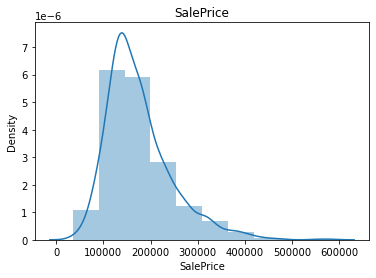

In [28]:
#Let's understand the Sales price
plt.title('SalePrice')
sns.distplot(housing_df['SalePrice'], bins=10)
plt.show()

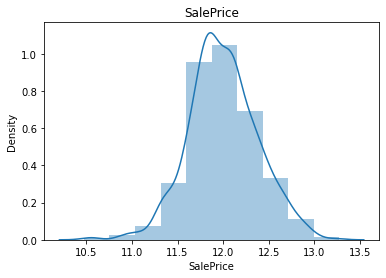

In [29]:
# Let's handle the outliers.

housing_df['SalePrice'] = np.log1p(housing_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_df['SalePrice'], bins=10)
plt.show()

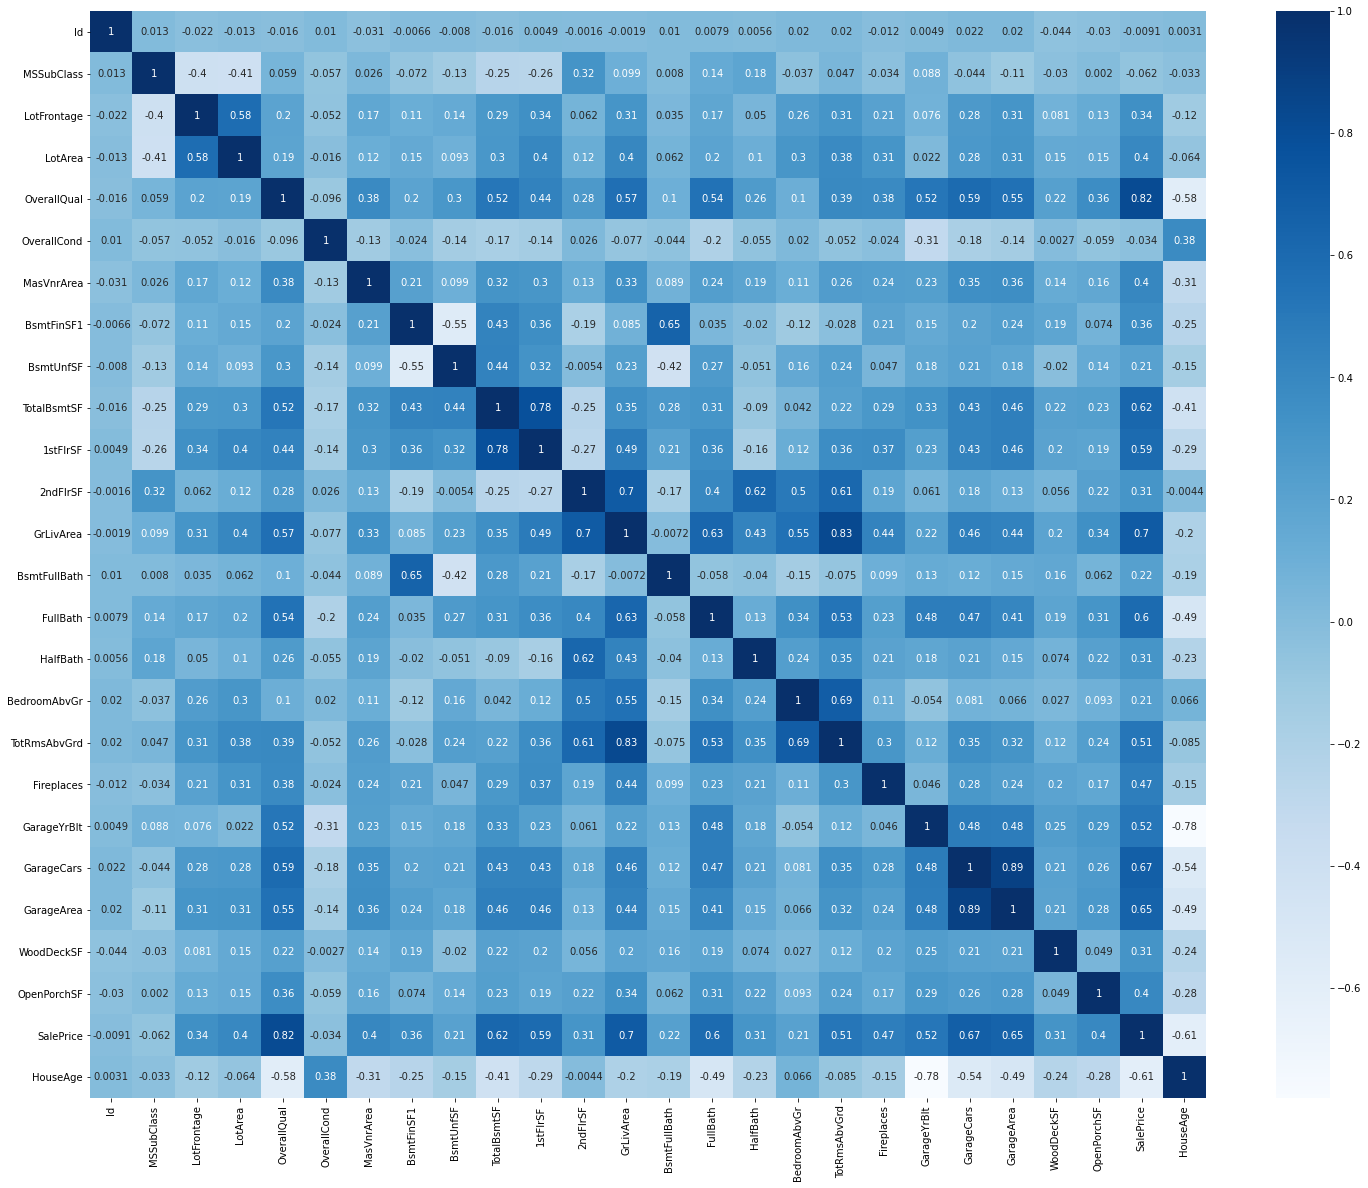

In [30]:
# Let's look on correlation
plt.figure(figsize = (25, 20))
sns.heatmap(housing_df.corr(), annot = True, cmap="Blues")
plt.show()

In [31]:
# Let's remove the high correlated vars

housing_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [32]:
# Let's assign meaningful number.
housing_df['LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['MasVnrType'] = housing_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['Fence'] = housing_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })

housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

housing_df['BldgType'] = housing_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })

housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })


housing_df['LotConfig'] = housing_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })


housing_df['SaleCondition'] = housing_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})


housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})


In [33]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,None,3,5,CollgCr,1,4,7,5,Gable,VinylSd,VinylSd,1,196.0,4,PConc,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,Attchd,2003.0,2,2,0,61,None,0,None,1,12.247699,5
1,2,20,RL,80.0,9600,None,3,2,Veenker,1,1,6,8,Gable,MetalSd,MetalSd,0,0.0,3,CBlock,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,Attchd,1976.0,2,2,298,0,None,0,None,1,12.109016,31
2,3,60,RL,68.0,11250,None,2,5,CollgCr,1,4,7,5,Gable,VinylSd,VinylSd,1,162.0,4,PConc,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,Attchd,2001.0,2,2,0,42,None,0,None,1,12.317171,7
3,4,70,RL,60.0,9550,None,2,4,Crawfor,1,4,7,5,Gable,Wd Sdng,Wd Shng,0,0.0,3,BrkTil,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,Detchd,1998.0,1,3,0,35,None,0,None,0,11.849405,91
4,5,60,RL,84.0,14260,None,2,2,NoRidge,1,4,8,5,Gable,VinylSd,VinylSd,1,350.0,4,PConc,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,Attchd,2000.0,2,3,192,84,None,0,None,1,12.429220,8


# Data Prepartaion

In [34]:
#Let's create dummies for these attributes.
colnames_for_dummy_var = ['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType']
for cnames_dummy in colnames_for_dummy_var:
    dummy_var = pd.get_dummies(housing_df[cnames_dummy], prefix=cnames_dummy, drop_first = True)
    housing_df = pd.concat([housing_df, dummy_var], axis = 1)
    

In [35]:
# Let's remove these columns not require any more.

housing_df = housing_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType','PoolQC', 'Alley', 'Fence','MiscFeature','Id'], axis=1)
housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2003.0,2,2,0,61,1,12.247699,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,1976.0,2,2,298,0,1,12.109016,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2001.0,2,2,0,42,1,12.317171,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1998.0,1,3,0,35,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2000.0,2,3,192,84,1,12.429220,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


# Train and Test

In [36]:
# Let's put all the features excpet response variable
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2003.0,2,2,0,61,1,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,1976.0,2,2,298,0,1,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2001.0,2,2,0,42,1,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1998.0,1,3,0,35,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2000.0,2,3,192,84,1,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [37]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2003.0,2,2,0,61,1,12.247699,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,1976.0,2,2,298,0,1,12.109016,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2001.0,2,2,0,42,1,12.317171,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1998.0,1,3,0,35,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2000.0,2,3,192,84,1,12.429220,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [38]:
# Let's assign response variable to y

y = housing_df['SalePrice']

In [39]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2003.0,2,2,0,61,1,12.247699,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,1976.0,2,2,298,0,1,12.109016,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2001.0,2,2,0,42,1,12.317171,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1998.0,1,3,0,35,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2000.0,2,3,192,84,1,12.429220,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [40]:
# Let's scale it.
col_names = X.columns
X = pd.DataFrame(scale(X))
X.head()
X.columns = col_names
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrType',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=109)

In [41]:
# Let's split the data into train and test
#np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

# RFE

In [42]:
# Let's run the RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [43]:
#Let's assign rfe support columns
col = X_train.columns[rfe.support_]


In [44]:
# Let's get those columns from train data set.
X_train_rfe = X_train[col]

In [45]:
# Let's assign to X_train and X_test

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Ridge Rgression

In [46]:
# Let's apply list of aplpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Let's dispaly the scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=100]
ridge_cv_results.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,0.003332,0.006143,0.006256,0.007662,4,{'alpha': 4.0},-0.084613,-0.070706,-0.076142,-0.080463,-0.079696,-0.078324,0.004665,1,-0.071196,-0.074941,-0.073677,-0.072522,-0.073041,-0.073075,0.001240
14,0.003789,0.002034,0.005982,0.006489,3,{'alpha': 3.0},-0.084622,-0.070675,-0.076213,-0.080471,-0.079645,-0.078325,0.004669,2,-0.071194,-0.074913,-0.073628,-0.072486,-0.073011,-0.073047,0.001230
16,0.003124,0.006249,0.003130,0.006261,5,{'alpha': 5.0},-0.084637,-0.070735,-0.076108,-0.080456,-0.079739,-0.078335,0.004667,3,-0.071198,-0.074971,-0.073724,-0.072556,-0.073070,-0.073104,0.001249
13,0.004384,0.002407,0.003185,0.001931,2,{'alpha': 2.0},-0.084695,-0.070642,-0.076296,-0.080482,-0.079583,-0.078339,0.004690,4,-0.071191,-0.074890,-0.073575,-0.072453,-0.072984,-0.073019,0.001223
17,0.003119,0.006237,0.002415,0.004830,6,{'alpha': 6.0},-0.084656,-0.070762,-0.076075,-0.080459,-0.079775,-0.078345,0.004669,5,-0.071205,-0.075002,-0.073771,-0.072596,-0.073099,-0.073134,0.001258
12,0.006583,0.001195,0.003994,0.000898,1,{'alpha': 1.0},-0.084775,-0.070613,-0.076383,-0.080498,-0.079511,-0.078356,0.004711,6,-0.071185,-0.074866,-0.073536,-0.072422,-0.072956,-0.072993,0.001216
18,0.006139,0.005240,0.001390,0.001944,7,{'alpha': 7.0},-0.084680,-0.070788,-0.076041,-0.080469,-0.079808,-0.078357,0.004673,7,-0.071218,-0.075033,-0.073816,-0.072635,-0.073125,-0.073165,0.001264
11,0.001995,0.002523,0.004746,0.007096,0.9,{'alpha': 0.9},-0.084783,-0.070610,-0.076393,-0.080500,-0.079503,-0.078358,0.004713,8,-0.071184,-0.074863,-0.073533,-0.072419,-0.072953,-0.072991,0.001216
10,0.009373,0.007653,0.003125,0.006250,0.8,{'alpha': 0.8},-0.084792,-0.070608,-0.076402,-0.080501,-0.079495,-0.078360,0.004715,9,-0.071183,-0.074860,-0.073531,-0.072417,-0.072950,-0.072988,0.001215
9,0.006256,0.007662,0.003117,0.006234,0.7,{'alpha': 0.7},-0.084800,-0.070606,-0.076411,-0.080503,-0.079487,-0.078362,0.004717,10,-0.071182,-0.074858,-0.073529,-0.072415,-0.072947,-0.072986,0.001215


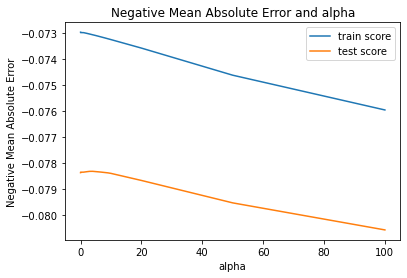

In [48]:
# Let's plot the mean train score and mean test score

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting the graph

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
# Let's look on cofficient value for alpha

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02537791, -0.02374163,  0.06457558,  0.04622426,  0.01408447,
        0.01348748,  0.00889492,  0.01000403, -0.01667919,  0.05385802,
        0.01845478,  0.01416363,  0.10931354,  0.0102528 ,  0.01082959,
        0.01411583,  0.01950986,  0.0158034 ,  0.01526487,  0.02646677,
        0.01246096,  0.01849271, -0.07118018,  0.04605364,  0.00954369,
        0.06237202,  0.05149882,  0.02226565, -0.01249581, -0.00674145,
       -0.0078388 ,  0.022062  , -0.00857655,  0.01749229, -0.02257214,
       -0.0195471 , -0.0077782 , -0.01933661, -0.02815375, -0.02028577,
       -0.01871388, -0.05752452, -0.02826098, -0.00927422,  0.01262752,
        0.01984898,  0.0056969 ,  0.03608403,  0.02081415,  0.02707691])

In [50]:
#Let's see the r2 scode on train and test data.
y_train_pred = ridge.predict(X_train)
print("R2 score on Train datset: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print("R2 score on Test datset: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score on Train datset:  0.9278094061668625
R2 score on Test datset:  0.8915028372858621


In [51]:
# Let's look on squared error.
mean_squared_error(y_test, ridge.predict(X_test))

0.01595422271115424

In [52]:
# Let's put the featue and coeffiecients

ridge_df = pd.DataFrame({'Feature name':X_train.columns, 'Coefficient Value':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by=['Coefficient Value'], ascending=False).head(10)

,Feature name,Coefficient Value
12,GrLivArea,0.1093
2,OverallQual,0.0646
25,MSZoning_RL,0.0624
9,TotalBsmtSF,0.0539
26,MSZoning_RM,0.0515
3,OverallCond,0.0462
23,MSZoning_FV,0.0461
47,GarageType_Attchd,0.0361
49,GarageType_Detchd,0.0271
19,GarageCars,0.0265


In [53]:
#Let's see the negative coffecient value
ridge_df.sort_values(by=['Coefficient Value'], ascending=True).head(5)

,Feature name,Coefficient Value
22,HouseAge,-0.0712
41,Exterior1st_VinylSd,-0.0575
42,Exterior1st_Wd Sdng,-0.0283
38,Exterior1st_HdBoard,-0.0282
1,BldgType,-0.0237


# Lasso Regression

In [54]:
lasso = Lasso()


params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# Let's display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.sort_values(by = ['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014162,0.003649,0.003588,0.001198,0.0001,{'alpha': 0.0001},-0.084823,-0.070462,-0.076416,-0.080414,-0.079755,-0.078374,0.004777,1,-0.071234,-0.074882,-0.073543,-0.072446,-0.072984,-0.073018,0.001205
1,0.006247,0.007651,0.003132,0.006264,0.0002,{'alpha': 0.0002},-0.084813,-0.070381,-0.076281,-0.080324,-0.080087,-0.078377,0.004826,2,-0.071301,-0.074937,-0.073591,-0.072523,-0.073057,-0.073082,0.001199
2,0.013492,0.009699,0.003397,0.002798,0.0003,{'alpha': 0.0003},-0.085157,-0.070299,-0.076118,-0.080252,-0.080418,-0.078449,0.004980,3,-0.071357,-0.075048,-0.073664,-0.072655,-0.073168,-0.073178,0.001210
3,0.034365,0.037489,0.000000,0.000000,0.0004,{'alpha': 0.0004},-0.085694,-0.070251,-0.075966,-0.080178,-0.080746,-0.078567,0.005178,4,-0.071436,-0.075180,-0.073773,-0.072808,-0.073320,-0.073303,0.001223
4,0.009374,0.007654,0.003124,0.006248,0.0005,{'alpha': 0.0005},-0.086342,-0.070151,-0.075830,-0.080081,-0.081023,-0.078686,0.005423,5,-0.071543,-0.075298,-0.073919,-0.072947,-0.073522,-0.073446,0.001227


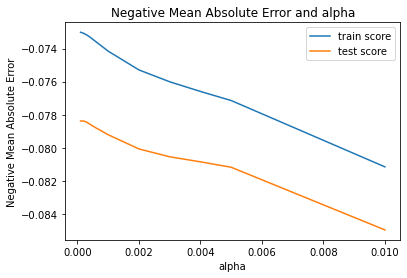

In [56]:
# Let's plot the mean train score and test score

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# Let's look into coffecient value on given alpha value

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02525314, -0.02377439,  0.06445655,  0.04641968,  0.01352414,
        0.01344209,  0.00861766,  0.0092319 , -0.01773825,  0.05587254,
        0.01832943,  0.01222295,  0.11189449,  0.00992042,  0.00948148,
        0.01292569,  0.01927805,  0.01557658,  0.01517628,  0.02660427,
        0.01221267,  0.01835538, -0.07300753,  0.0502244 ,  0.01134965,
        0.07043206,  0.05850356,  0.02229429, -0.01240601, -0.00675865,
       -0.00772447,  0.02223442, -0.00840138,  0.0175208 , -0.0217783 ,
       -0.01872689, -0.00769407, -0.018028  , -0.02883025, -0.02068809,
       -0.0190031 , -0.06090392, -0.02841526, -0.00929869,  0.0109076 ,
        0.02225579,  0.00532599,  0.03573286,  0.02043204,  0.0267302 ])

In [58]:
#let's calculate the r2 score on train and test dataset.
y_train_pred = lasso.predict(X_train)
print("R2 score on Train datset: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("R2 score on Test datset: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score on Train datset:  0.9278741947707826
R2 score on Test datset:  0.8919480834238646


In [59]:
#Let's calcuate the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015888750436402792

In [60]:
#Let's look on featues and respective coeffeient value.
lasso_df = pd.DataFrame({'Feature Name':X_train.columns, 'Coefficient Value':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient Value'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by=['Coefficient Value'], ascending=False).head(10)

,Feature Name,Coefficient Value
12,GrLivArea,0.1119
25,MSZoning_RL,0.0704
2,OverallQual,0.0645
26,MSZoning_RM,0.0585
9,TotalBsmtSF,0.0559
23,MSZoning_FV,0.0502
3,OverallCond,0.0464
47,GarageType_Attchd,0.0357
49,GarageType_Detchd,0.0267
19,GarageCars,0.0266


In [61]:
#Let's see the netagive coffient value by sorting it ascednig order.
lasso_df.sort_values(by=['Coefficient Value'], ascending=True).head()

,Feature Name,Coefficient Value
22,HouseAge,-0.0730
41,Exterior1st_VinylSd,-0.0609
38,Exterior1st_HdBoard,-0.0288
42,Exterior1st_Wd Sdng,-0.0284
1,BldgType,-0.0238


# Conclusion
 1) These are the obesrvation while running the model on Ridge and Lasso Rgerssion
 
 
   a) Alpha value
   
      Riedge : 4
      Lasso: .0001
      
      
   b)  Mean sqaured error
   
       Reidge :0.01595422271115424
       Lasso:  0.015888750436402792
     
       
   c)  top 5 Highest coffecient Value
   
            GrLivArea	
            OverallQual	
            MSZoning_RL	
            TotalBsmtSF	
            MSZoning_RM	
       
   d) Top 5 Lowest coffecient Value
   
            HouseAge	
            Exterior1st_VinylSd	
            Exterior1st_HdBoard	
            Exterior1st_Wd Sdng	
            BldgType	
   
   
   e) Model accuracy on Tain and Test data
   
      Reidge:
      
         R2 score on Train datset:  0.9278094061668625
         R2 score on Test datset:  0.8915028372858621
          
      Lasso:
      
          R2 score on Train datset:  0.9278741947707826
          R2 score on Test datset:  0.8919480834238646
      
   
    